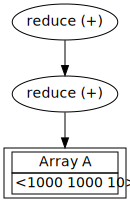

In [41]:
from moa.frontend import LazyArray

_A = LazyArray(shape=(1000, 1000, 10), name='A')

expression = _A.reduce('+').reduce('+')
expression

In [42]:
# numba doesn't optimize code
# this means that you must move expressions
# out of loops manually! (this made this code x1000 faster)
print(expression.compile(use_numba=True))



@numba.jit
def f(A):
    
    
    if (not (len(A.shape) == 3)):
        
        raise Exception('arguments have invalid dimension')
    
    if (not ((10 == A.shape[2]) and ((1000 == A.shape[1]) and (1000 == A.shape[0])))):
        
        raise Exception('arguments do not match declared shape')
    
    _a16 = numpy.zeros(())
    
    _a18 = numpy.zeros(())
    
    _a14 = numpy.zeros((10,))
    
    for _i1 in range(0, 10, 1):
        
        _a18 = 0
        
        for _i3 in range(0, 1000, 1):
            
            _a16 = 0
            
            for _i5 in range(0, 1000, 1):
                
                _a16 = (_a16 + A[(_i5, _i3, _i1)])
            
            _a18 = (_a18 + _a16)
        
        _a14[(_i1,)] = _a18
    return _a14


In [43]:
import numba
import numpy

A = numpy.random.random((1000, 1000, 10))

exec(expression.compile(use_numba=True))

In [44]:
%%timeit

f(A=A)

81.6 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
f(A=A)

array([499937.96283215, 499907.21268619, 500088.56343786, 500273.82673681,
       500498.60659954, 500016.55835758, 499734.80332504, 500553.13379038,
       499661.78225155, 500064.78881993])

In [46]:
%%timeit

A.sum(axis=0).sum(axis=0)

5.49 ms ± 85.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
A.sum(axis=0).sum(axis=0)

array([499937.96283215, 499907.21268619, 500088.56343786, 500273.82673681,
       500498.60659954, 500016.55835758, 499734.80332504, 500553.13379038,
       499661.78225155, 500064.78881993])